## Assignment

第一关：尝试在PC上编程显示自己拍摄的图片。

第二关：尝试显示拍摄的准确时间

第三关：尝试编程将其转换为灰度图像。

第四关：尝试显示图的大小，以及四个角所在位置象素的数值。

第五关：尝试在另外一个时刻拍摄大致的另外一张图片，并设法分别显示两张图的区别和共同部分

有创意，表达效果好的有加成。

## Task 1: Display Images on the Computer

In [8]:
from PIL import Image
from PIL.ExifTags import TAGS

# Get the `Image` object.
im = Image.open("seahorse_1.jpg")

### Solution 1: `Image.show()`

In [9]:
im.show()

+ The simplest way is to call the built-in `show()` method.
+ Popping up an image in a new window is cumbersome for lack of interactive effect.

### Solution 2: `plt.show()`

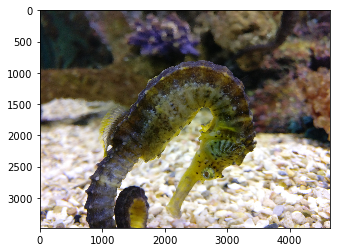

In [10]:
from matplotlib.pyplot import imshow, rcParams
import numpy as np

rcParams['image.cmap'] = 'gray'
% matplotlib inline

imshow(im)

## Task 2: Show the Accurate Shooting Time

In [11]:
# Fetch all Exif data.
# ---------------------------------------
# for k, v in im._getexif().items():
#     print('%s = %s' % (TAGS.get(k), v))
# ---------------------------------------

def show_accurate_time(im):
    exif_info = im._getexif()
    image_taken_time = (v for k, v in exif_info.items() if TAGS[k].lower() == 'datetime')
    # For better representations.
    date, time = next(image_taken_time).split()
    # Print results.
    return ("%s，%s" % (time, date.replace(':', '-')))

print('This photo was taken at', show_accurate_time(im))

This photo was taken at 16:27:10，2017-01-21


## Task 3: Convert to Gray Image

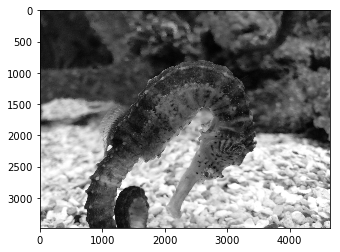

In [12]:
im_gray = im.convert(mode='L')
imshow(im_gray)

## Task 4: Get the Image Size and Specific Pixel Values

In [13]:
height = im.height
width = im.width

# In a line.
# ------------------------
# width, height = im.size
# ------------------------

print("Height: %5d\nWidth: %6d" % (height, width))

Height:  3480
Width:   4640


### Solution 1: `Image.getpixel()`

In [14]:
required_pixel_positions = [(0, 0), (width - 1, 0), (0, height - 1), (width - 1, height - 1)]
required_pixel_values = [im.getpixel(pos) for pos in required_pixel_positions]

In [15]:
print("\
               R   G   B\n\
Top-left:     {}\n\
Top-right:    {}\n\
Bottom-left:  {}\n\
Bottom-right: {}".format(*required_pixel_values)) 

               R   G   B
Top-left:     (60, 61, 45)
Top-right:    (87, 66, 71)
Bottom-left:  (240, 238, 251)
Bottom-right: (255, 237, 193)


### Solution 2: `np.array` Indexing

In [16]:
import numpy as np

im_ar = np.array(im)
im_ar.shape         # Check for correct conversion.

(3480, 4640, 3)

In [17]:
required_pixel_positions_ar = [(0, 0), (-1, 0), (0, -1), (-1, -1)]
required_pixel_values_ar = [im_ar[pos] for pos in required_pixel_positions_ar]

In [18]:
print("\
               R   G   B\n\
Top-left:     {}\n\
Top-right:    {}\n\
Bottom-left:  {}\n\
Bottom-right: {}".format(*required_pixel_values_ar)) 

               R   G   B
Top-left:     [60 61 45]
Top-right:    [240 238 251]
Bottom-left:  [87 66 71]
Bottom-right: [255 237 193]


**CAUTION**:<br>
Under array-like representation, *row* corresponds *height*, and *coloum* corresponds *width* .

## Task 5: Compare Two Similar Images

In [19]:
im_1 = Image.open("seahorse_1.jpg")
im_2 = Image.open("seahorse_2.jpg")

In [20]:
print('Seahores_1 was taken at', show_accurate_time(im_1))
print('Seahores_2 was taken at', show_accurate_time(im_2))

Seahores_1 was taken at 16:27:10，2017-01-21
Seahores_2 was taken at 16:27:12，2017-01-21


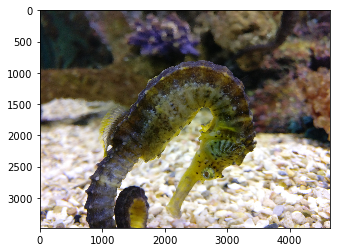

In [21]:
imshow(im_1)

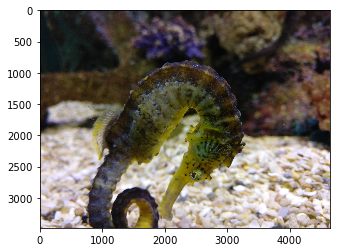

In [22]:
imshow(im_2)

### Solution 1: RMS

In [23]:
# Convert to array
im_1_ar, im_2_ar = [np.array(item) for item in [im_1, im_2]]
diff_ar = abs(im_1_ar - im_2_ar)
rms = np.sqrt(np.mean(np.square(diff_ar), axis=(0, 1)))
print("The RMS(root mean square) of two images through RGB channels:", rms)

The RMS(root mean square) of two images through RGB channels: [ 9.79224144  9.84867631  9.66708834]


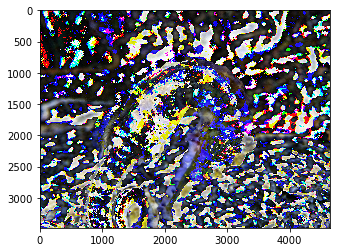

In [24]:
imshow(diff_ar)

### Solution 2: `ImageChops.difference()`

In [25]:
from PIL import ImageChops

diff_rgb = ImageChops.difference(im_1, im_2)
diff_rgb_invert = ImageChops.invert(diff_rgb)

#### RGB difference

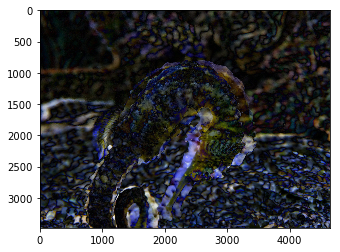

In [26]:
imshow(diff_rgb)

#### RGB inverse differnce

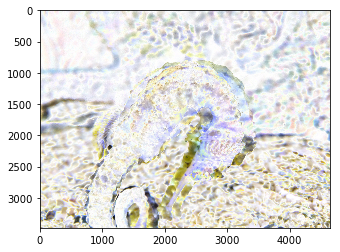

In [27]:
imshow(diff_rgb_invert)

### Solution 3: Grayscale difference

In [28]:
diff_gray = diff_rgb.convert('L')
diff_gray_invert = ImageChops.invert(diff_gray)

#### Gray difference

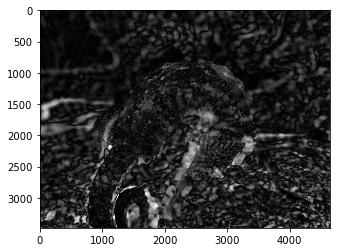

In [29]:
imshow(diff_gray)

#### Gray inverse difference

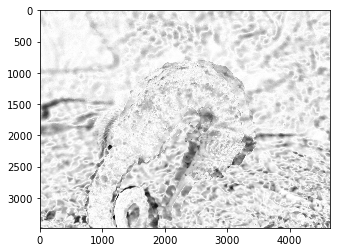

In [30]:
imshow(diff_gray_invert)